In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from IPython.display import display, HTML

with open("diabetes.csv", 'r') as csvfile:
    data = pd.read_csv(csvfile)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data_numeric = data[numeric_columns]
data_normalized = (data_numeric - data_numeric.min()) / (data_numeric.max() - data_numeric.min())

In [5]:
data_normalized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [6]:
def fold_i_of_k(dataset, i, k):
    n = len(dataset)
    return dataset[n*(i-1)//k:n*i//k]

In [7]:
shuffle_data = data_normalized.sample(frac=1)
diabetes_true = shuffle_data[shuffle_data.Outcome == 1]
diabetes_false = shuffle_data[shuffle_data.Outcome == 0]

KFOLDS = 10
folds_false = [fold_i_of_k(diabetes_false, i+1, KFOLDS) for i in range(KFOLDS)]
folds_true = [fold_i_of_k(diabetes_true, i+1, KFOLDS) for i in range(KFOLDS)]

folds = [pd.DataFrame(np.concatenate((folds_true[i], folds_false[i]), axis=0), columns=shuffle_data.columns) for i in range(KFOLDS)]
folds[0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.058824,0.567839,0.524590,0.353535,0.000000,0.500745,0.198548,0.000000,1.0
1,0.411765,0.974874,0.557377,0.282828,0.000000,0.535022,0.284799,0.333333,1.0
2,0.470588,0.984925,0.622951,0.292929,0.330969,0.558867,0.225021,0.600000,1.0
3,0.470588,0.758794,0.639344,0.323232,0.248227,0.639344,0.187020,0.250000,1.0
4,0.000000,0.527638,0.688525,0.000000,0.000000,0.415797,0.283091,0.683333,1.0
5,0.058824,0.643216,0.803279,0.414141,0.068558,0.476900,0.530743,0.200000,1.0
6,0.058824,0.442211,0.245902,0.424242,0.117021,0.819672,0.178480,0.083333,1.0
7,0.352941,0.628141,0.639344,0.313131,0.000000,0.411326,0.207942,0.466667,1.0
8,0.294118,0.577889,0.622951,0.000000,0.000000,0.464978,0.113151,0.383333,1.0
9,0.882353,0.683417,0.573770,0.323232,0.130024,0.552906,0.032024,0.366667,1.0


In [13]:
KNEIGHBORS = 5

def knn(trainingFold, testFold, numNeighbors):
    testFoldCopy = pd.DataFrame(testFold.values, columns=testFold.columns)
    for index, instance in testFold.iterrows():        
        newTrainingDataset = trainingFold
        newTrainingDataset['Distance'] = newTrainingDataset.sub(instance).pow(2).sum(1).pow(0.5)
        newTrainingDataset = newTrainingDataset.sort_values('Distance')
        kNeighbors = newTrainingDataset[0:numNeighbors]
        #print kNeighbors
        
        if (kNeighbors[kNeighbors.Outcome == 0]['Outcome'].count() > kNeighbors[kNeighbors.Outcome == 1]['Outcome'].count()):
            testFoldCopy.at[(index, 'Outcome')] = 0
        else:
            testFoldCopy.at[(index, 'Outcome')] = 1

    return testFoldCopy

   
    

In [14]:
accuracy = [0 for i in range(KFOLDS)]
f1_score = [0 for i in range(KFOLDS)]

def calculateAccuracyAndF1(testFold, results):
    incorrect = 0
    fp = fn = vp = vn = 0
    for i in range(len(testFold)):
        if testFold.at[i, 'Outcome'] != results.at[i, 'Outcome']:
            incorrect += 1 # For acurracy
            if results.at[i, 'Outcome'] == 0:
                fn += 1
            else:
                fp += 1
        else:
            if results.at[i, 'Outcome'] == 0:
                vn += 1
            else:
                vp += 1

    rev =  vp / float(vp + fn)
    prec = vp / float(vp + fp)
    
    f1 = 2 * (prec * rev / float(prec + rev))

    return (1 - (incorrect/float(len(testFold)))), f1

for i in range(KFOLDS):
    # Concatenate and remove outcome
    testing_fold_np = np.concatenate((folds_true[i], folds_false[i]), axis=0)
    original_testing_fold = pd.DataFrame(testing_fold_np, columns=shuffle_data.columns)
    testing_fold_np = np.delete(testing_fold_np, 8, axis=1)
    testing_fold = pd.DataFrame(testing_fold_np, columns=shuffle_data.columns[0:8]) #without Outcome
    
    training_fold_np = None
    for j in range(KFOLDS):
        if (i != j):
            if training_fold_np is None:
                training_fold_np = np.concatenate((folds_true[j], folds_false[j]), axis=0)
            else:
                training_fold_np = np.concatenate((training_fold_np, folds_true[j], folds_false[j]), axis=0)
    training_fold = pd.DataFrame(training_fold_np, columns=shuffle_data.columns)
    
    #display(testing_fold)
    #display(training_fold)
    
    results = knn(training_fold, testing_fold, KNEIGHBORS);
    #print("RESULTADOS")
    #display(results)
    
    acc, f1 = calculateAccuracyAndF1(original_testing_fold, results)
    accuracy[i] = acc
    f1_score[i] = f1
    print "FOLD #%d ->  acc:%f  f1:%f" % (i, acc, f1)
    

FOLD #0 ->  acc:0.789474  f1:0.652174


FOLD #1 ->  acc:0.727273  f1:0.511628


FOLD #2 ->  acc:0.766234  f1:0.666667


FOLD #3 ->  acc:0.714286  f1:0.592593


FOLD #4 ->  acc:0.714286  f1:0.560000


FOLD #5 ->  acc:0.750000  f1:0.595745


FOLD #6 ->  acc:0.779221  f1:0.690909


FOLD #7 ->  acc:0.779221  f1:0.701754


FOLD #8 ->  acc:0.701299  f1:0.510638


FOLD #9 ->  acc:0.727273  f1:0.553191


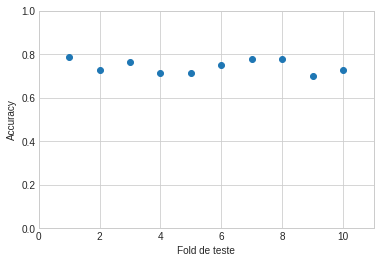

In [15]:
plt.xlim(0, 11)
plt.ylim(0, 1)
plt.xlabel("Fold de teste")
plt.ylabel("Accuracy")
plt.scatter(xrange(1,KFOLDS+1), accuracy, marker='o');

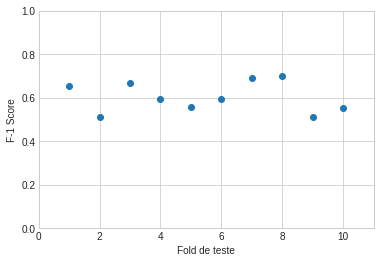

In [16]:
plt.xlim(0, 11)
plt.ylim(0, 1)
plt.xlabel("Fold de teste")
plt.ylabel("F-1 Score")
plt.scatter(xrange(1,KFOLDS+1), f1_score, marker='o');


In [17]:
accuracy_avg = np.average(accuracy)
accuracy_std = np.std(accuracy)
f1_avg = np.average(f1_score)
f1_std = np.std(f1_score)
print "Acurácia   -> \tMédia: %.2f\tDesvio Padrão: %.2f" % (accuracy_avg, accuracy_std)
print "Escore F-1 -> \tMédia: %.2f\tDesvio Padrão: %.2f" % (f1_avg, f1_std)

Acurácia   -> 	Média: 0.74	Desvio Padrão: 0.03
Escore F-1 -> 	Média: 0.60	Desvio Padrão: 0.07
